## Занятие 7
## Математический анализ
## Исследование функции с sympy.calculus.util и sympy.calculus.singularities

In [ ]:
!python -m pip install sympy --upgrade 
!python -m pip install sympy --upgrade !python -m pip install -U matplotlib 

Requirement already up-to-date: sympy in /usr/local/lib/python3.7/dist-packages (1.7.1)

Usage:   
  /usr/bin/python3 -m pip install [options] <requirement specifier> [package-index-options] ...
  /usr/bin/python3 -m pip install [options] -r <requirements file> [package-index-options] ...
  /usr/bin/python3 -m pip install [options] [-e] <vcs project url> ...
  /usr/bin/python3 -m pip install [options] [-e] <local project path> ...
  /usr/bin/python3 -m pip install [options] <archive url/path> ...

no such option: -m


In [ ]:
import sympy
from sympy import S, Interval, plot, Symbol
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import exp as Exp
from sympy import log as Log
from sympy import pi as Pi
from sympy.calculus.util import continuous_domain, function_range, periodicity, stationary_points, maximum, minimum, AccumBounds
from sympy.calculus.singularities import singularities, is_increasing, is_decreasing, is_monotonic
from sympy.calculus.singularities import is_strictly_increasing, is_strictly_decreasing
%matplotlib inline

## Схема анализа функции.
1. Область определения

sympy.calculus.util.continuous_domain(f, symbol, domain)

f - выражение, описывающее функцию, 

symbol - переменная, от которой зависит исследуемая функция,

domain - область значений переменной, на которой рассматривается функция,

если функция рассматривается на всей вещественной прямой, то domain=S.Reals

Сингулярные точки (точки, в которых функция не существует) находятся с помощью

sympy.calculus.singularities.singularities(f, symbol, domain=None)

2. Область значений

sympy.calculus.util.function_range(f, symbol, domain)

3. Периодичность

sympy.calculus.util.periodicity(f, symbol, check=False)

4. Стационарные точки 

sympy.calculus.util.stationary_points(f, symbol, domain=Reals)

5. Точки экстремума

sympy.calculus.util.maximum(f, symbol, domain=Reals)

sympy.calculus.util.minimum(f, symbol, domain=Reals)

6. Монотонность

sympy.calculus.singularities.is_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_increasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_monotonic(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_decreasing(f, interval=Reals, symbol=None)

sympy.calculus.singularities.is_strictly_increasing(f, interval=Reals, symbol=None)

7. Минимальное и максимальное значение функции на интервале 

sympy.calculus.util.AccumulationBounds(min, max)

Свойства: delta, max, min, mid

### Задание 1.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7 на одном периоде, построить график.
$$
f(x) = e^{\sin(x)}.
$$
###### 1. Область определения

In [ ]:
x = Symbol('x')
f = Exp(Sin(x))
domainf = S.Reals
continuous_domain(f, x, domainf)

Reals

Сингулярные точки (точки, где функция не определена)

In [ ]:
singularities(f, x, domainf)

EmptySet

###### 2. Область значений

In [ ]:
function_range(f, x, domainf)

Interval(exp(-1), E)

###### 3. Периодичность

In [ ]:
periodicity(f, x)

2*pi

###### 4. Стационарные точки

In [ ]:
sp = stationary_points(f, x, domainf)
sp

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

###### 5. Максимальное и минимальное значения функции

In [ ]:
display(minimum(f, x, domainf))
display(maximum(f, x, domainf))

exp(-1)

E

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [ ]:
period_pi = Interval(0, 2*Pi)

Сингулярные точки (точки, где функция не определена)

In [ ]:
singularities(f, x, period_pi)

EmptySet

###### 2. Область значений

In [ ]:
function_range(f, x, period_pi)

Interval(exp(-1), E)

###### 4. Стационарные точки 

In [ ]:
stationary_points(f, x, period_pi)

FiniteSet(pi/2, 3*pi/2)

###### 5. Максимальное и минимальное значения функции

In [ ]:
display(minimum(f, x, period_pi))
display(maximum(f, x, period_pi))

exp(-1)

E

###### 6. Монотонность
Исследовать на периоде открытые интервалы (Interval.open), на которые период разбивают стационарные точки.

In [ ]:
#int1 = Interval.Open()
display(is_monotonic(f, period_pi))

False

###### 7. Минимальное и максимальное значение функции на интервале 
Найти максимальное и минимальное значение функции на каждом из интервалов монотонности в пределах одного периода

In [ ]:
display(minimum(f, x, period_pi))
display(maximum(f, x, period_pi))

exp(-1)

E

###### График функции на одном периоде.

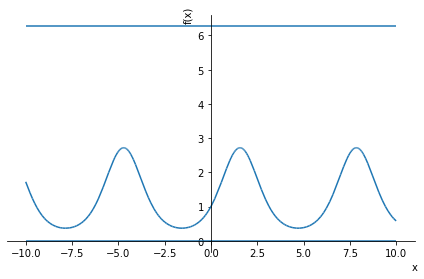

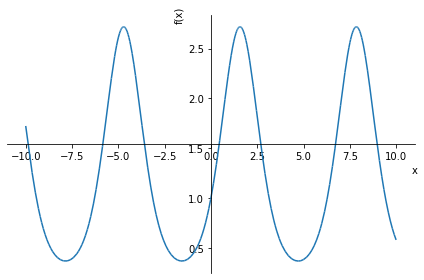

In [ ]:
plot(f, 0, 2*Pi)

plot(f)

### Задание 2.  
Исследовать функцию по п.1 - 5 на области определения и по п. 1 - 7  на одном периоде, построить график.
$$
f(x) = \frac{1}{\sin(x) + \cos(x)}.
$$
###### 1. Область определения

In [ ]:
#Хочу исключить 3pi/4 и 7pi/4 из S.Reals, потому что там функция не определена
f2 = 1/(Sin(x) + Cos(x))
dom =  continuous_domain(f2, x, S.Reals)
display(dom)

Complement(Reals, Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers)))

Сингулярные точки (точки, где функция не определена)

In [ ]:
singularities(f2, x)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))

###### 2. Область значений

In [ ]:
function_range(f2, x, S.Reals)

Union(Interval(-oo, -sqrt(2)/2), Interval(sqrt(2)/2, oo))

###### 3. Периодичность

In [ ]:
periodicity(f2, x)

2*pi

###### 4. Стационарные точки

In [ ]:
stationary_points(f2, x, dom)

Union(Complement(ImageSet(Lambda(_n, 2*_n*pi + 5*pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))), Complement(ImageSet(Lambda(_n, 2*_n*pi + pi/4), Integers), Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers))))

###### 5. Максимальное и минимальное значения функции

In [ ]:
display(minimum(f2, x, S.Reals))
display(maximum(f2, x))

-oo

oo

##### Исследование периодической функции на одном периоде.
Найти пересечение с периодом области определения, множества сингулярных точек и стационарных точек.
###### 1. Область определения

In [ ]:
#Период тоже самый

Сингулярные точки (точки, где функция не определена)

In [ ]:
singularities(f2, x, period_pi)

FiniteSet(3*pi/4, 7*pi/4)

###### 2. Область значений

In [ ]:
function_range(f2, x, period_pi)

Union(Interval(-oo, -sqrt(2)/2), Interval(sqrt(2)/2, oo))

###### 4. Стационарные точки

In [ ]:
stationary_points(f2, x, period_pi)

FiniteSet(pi/4, 5*pi/4)

###### 5. Максимальное и минимальное значения функции

In [ ]:
display(minimum(f2, x))
display(maximum(f2, x))

-oo

oo

###### 6. Монотонность

In [ ]:
is_monotonic(f2, period_pi)

False

###### 7. Минимальное и максимальное значение функции на периоде

In [ ]:
display(minimum(f2, x, period_pi))
display(maximum(f2, x, period_pi))

-oo

oo

###### График

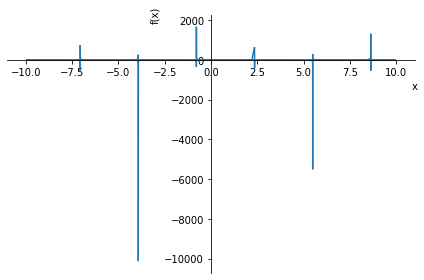

In [ ]:
plot(f2, -10, 3*Pi/4)

### Индивидуальное задание.  
Исследовать функцию $f(x)$, найти минимальное и максимальное значение на каком-нибудь конечном интервале, не содержащем точек разрыва, построить график.

### Вариант 131

$f(x) = 2 x^{2} \sqrt{1 - x^{2}}$

###### 1. Область определения

In [ ]:
f = 2*x**2*sympy.sqrt(1-x**2)
domain = continuous_domain(f, x, S.Reals)
display(domain)

Interval(-1, 1)

Сингулярные точки (точки, где функция не определена)

In [ ]:
singularities = singularities(f, x)
display(singularities)

EmptySet

###### 2. Область значений

In [ ]:
range = function_range(f, x, S.Reals)
display(range)

Interval(0, 4*sqrt(3)/9)

###### 3. Периодичность

In [ ]:
display(periodicity(f, x, check=False))

None

###### 4. Стационарные точки

In [ ]:
display(stationary_points(f, x))

FiniteSet(0, -sqrt(6)/3, sqrt(6)/3)

###### 5. Максимальное и минимальное значения функции

In [ ]:
display(maximum(f, x), minimum(f, x))

4*sqrt(3)/9

0

###### 6. Монотонность  

In [ ]:
display(is_decreasing(f),
is_increasing(f),
is_monotonic(f),
is_strictly_decreasing(f),
is_strictly_increasing(f))

False

False

False

False

False

###### 7. Минимальное и максимальное значение функции на интервале 

In [ ]:
display(maximum(f, x), minimum(f, x))

4*sqrt(3)/9

0

###### График

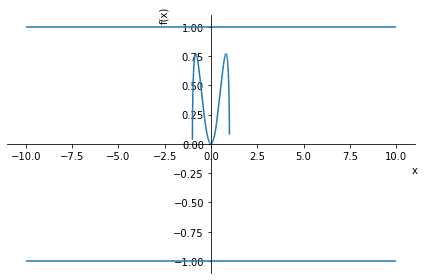

In [ ]:
plot(f, -1, 1)